In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1fd4yGGGD7dEW16doSpBYm42bMauJc9Vm'}) # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv') 

In [0]:
import pandas as pd
xyz=pd.read_csv('data.csv')

In [0]:
xyz=xyz.drop(['id'],axis=1)

In [36]:
import numpy as np
xyz.shape

(569, 32)

In [37]:
xyz.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
xyz['diagnosis']=xyz['diagnosis'].map({'M':1,'B':0}).astype(int)

In [39]:
xyz.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


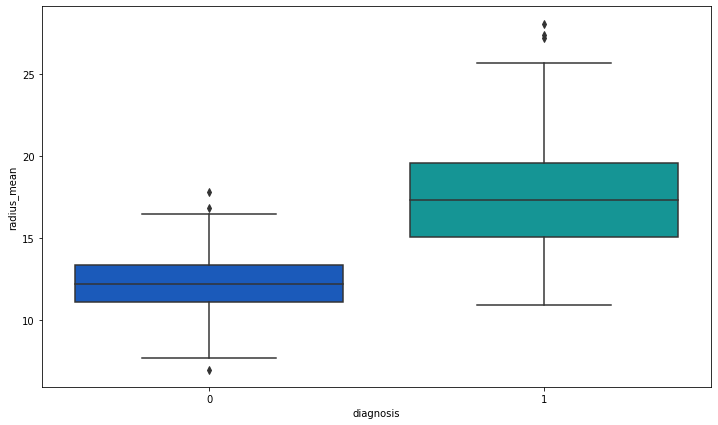

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
sns.boxplot(x='diagnosis',y='radius_mean',data=xyz,palette='winter')

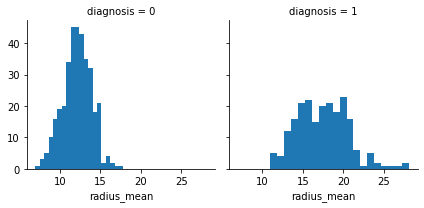

In [41]:
g=sns.FacetGrid(xyz,col='diagnosis')
g.map(plt.hist,'radius_mean',bins=20)

In [0]:
def rad(cols):
  radius=cols[0]
  if radius<15:
    return 0;
  else:
    return 1;
xyz['radius_mean']=xyz[['radius_mean']].apply(rad,axis=1);

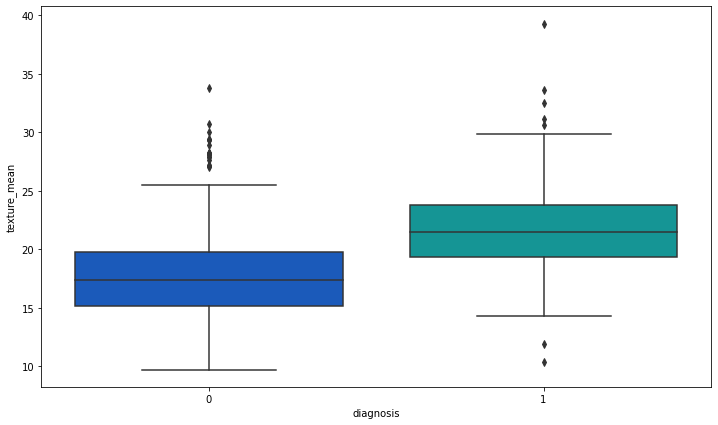

In [43]:
plt.figure(figsize=(12,7))
sns.boxplot(x='diagnosis',y='texture_mean',data=xyz,palette='winter')

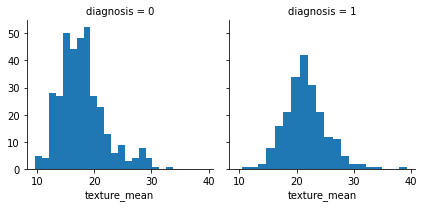

In [44]:
g=sns.FacetGrid(xyz,col='diagnosis')
g.map(plt.hist,'texture_mean',bins=20)

In [0]:
#texture

def rad(cols):
  radius=cols[0]
  if radius<19:
    return 0;
  else:
    return 1;
xyz['texture_mean']=xyz[['texture_mean']].apply(rad,axis=1);

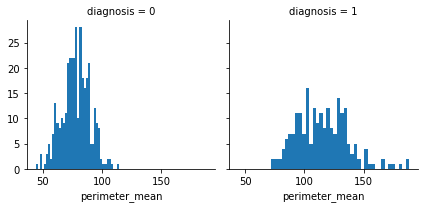

In [46]:
g=sns.FacetGrid(xyz,col='diagnosis')
g.map(plt.hist,'perimeter_mean',bins=40)

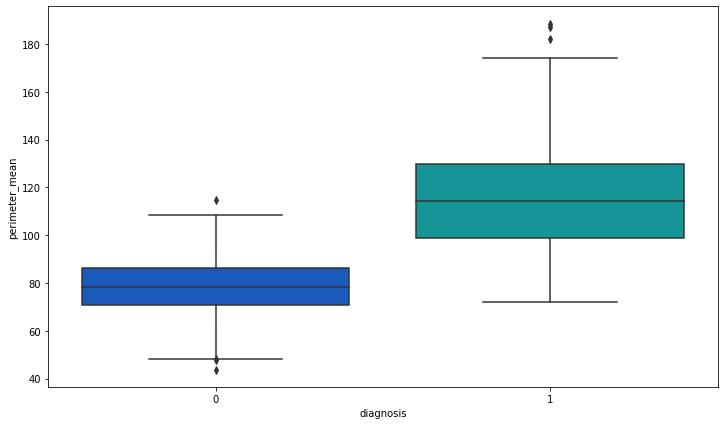

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x='diagnosis',y='perimeter_mean',data=xyz,palette='winter')

In [0]:
#_meanperimeter

def rad(cols):
  peri=cols[0]
  if peri<90:
    return 0;
  else:
    return 1;
xyz['perimeter_mean']=xyz[['perimeter_mean']].apply(rad,axis=1);

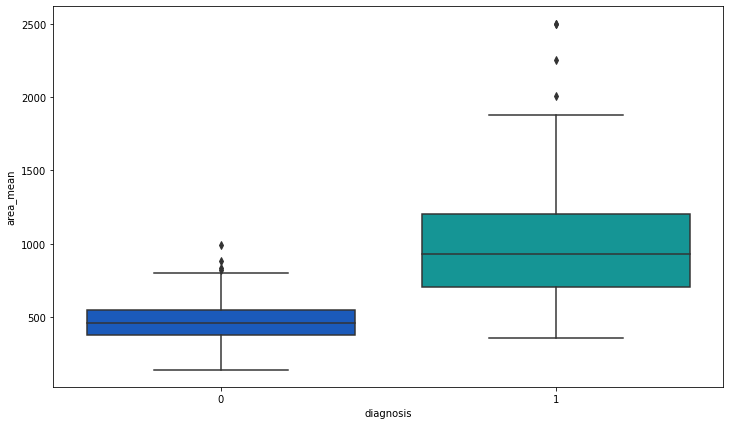

In [49]:
plt.figure(figsize=(12,7))
sns.boxplot(x='diagnosis',y='area_mean',data=xyz,palette='winter')

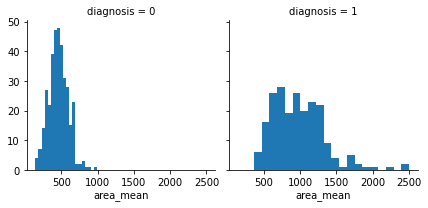

In [50]:
g=sns.FacetGrid(xyz,col='diagnosis')
g.map(plt.hist,'area_mean',bins=20)

In [0]:
#_meanarea

def rad(cols):
  area=cols[0]
  if area<550:
    return 0;
  else:
    return 1;
xyz['area_mean']=xyz[['area_mean']].apply(rad,axis=1);

In [52]:
xyz.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,1,0,1,1,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,1,0,1,1,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,1,1,1,1,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,0,1,0,0,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,1,0,1,1,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
from sklearn import preprocessing
x=xyz[['perimeter_se']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xyz[['perimeter_se']] = pd.DataFrame(x_scaled)

In [0]:
x=xyz[['area_se']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xyz[['area_se']] = pd.DataFrame(x_scaled)

x=xyz[['radius_worst']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xyz[['radius_worst']] = pd.DataFrame(x_scaled)

x=xyz[['texture_worst']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xyz[['texture_worst']] = pd.DataFrame(x_scaled)

x=xyz[['perimeter_worst']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xyz[['perimeter_worst']] = pd.DataFrame(x_scaled)

x=xyz[['area_worst']].values.astype(float)
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
xyz[['area_worst']] = pd.DataFrame(x_scaled)

In [58]:
xyz.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

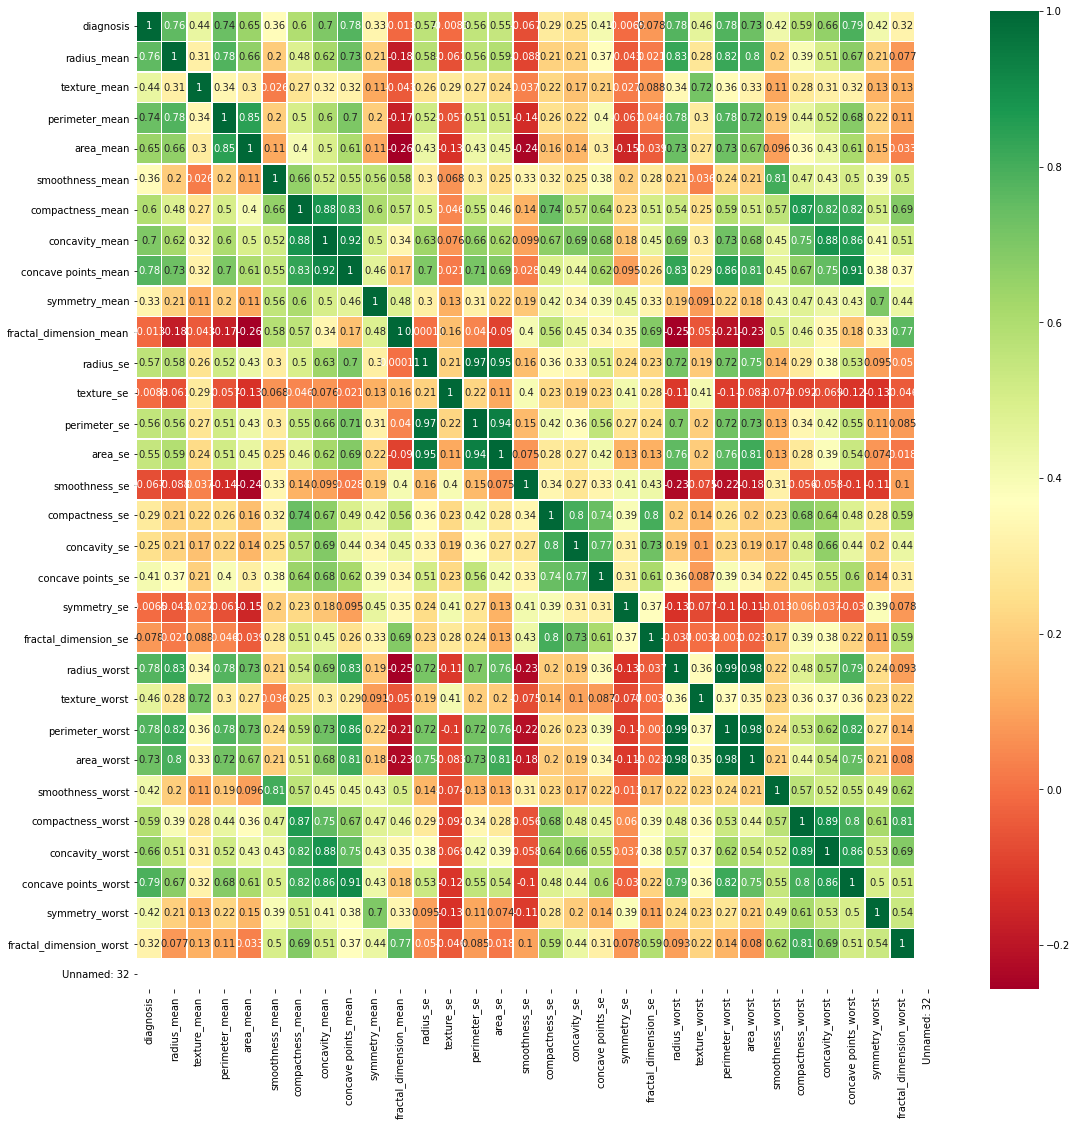

In [73]:
plt.figure(figsize=(18,18))
p=sns.heatmap(xyz.corr(),annot=True,linewidth=0.5,cmap ='RdYlGn')


Accuracy is:  0.9649122807017544


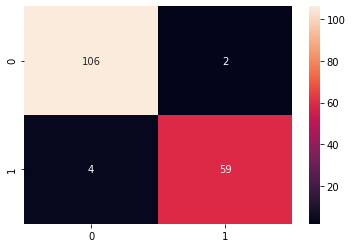

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x=xyz.drop('diagnosis',axis=1)
x=x.drop('Unnamed: 32',axis=1)
y=xyz['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [66]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
acc_log=round(logistic.score(x_train, y_train)*100,2)
acc_log

94.22

In [0]:
#featureselection

from sklearn.feature_selection import RFE
clf_rf_3=RandomForestClassifier()   
rfe=RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe=rfe.fit(x_train,y_train)

In [75]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')
